In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.layers.core import Dense, Dropout, Activation
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import math
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import warnings
import seaborn as sns
import sys
warnings.filterwarnings('ignore')

/Users/apple/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv('../../raw/LiChuan/TotalDataSet.csv')
submit = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')

In [3]:
data = data[data['year'] != 2012]

In [4]:
data_new=data[['sale_date', 'class_id', 'sale_quantity',]]

In [5]:
data_new['num_time']=(data['year']-2012)*12+data['month']

In [6]:
data_new

,sale_date,class_id,sale_quantity,num_time
1680,2013-01,125403,238.0,13.0
1681,2013-01,136916,613.0,13.0
1682,2013-01,178529,1465.0,13.0
1683,2013-01,194450,106.0,13.0
1684,2013-01,198427,31.0,13.0
1685,2013-01,209945,283.0,13.0
1686,2013-01,248352,1428.0,13.0
1687,2013-01,281301,1555.0,13.0
1688,2013-01,290854,676.0,13.0
1689,2013-01,291086,1089.0,13.0


In [7]:
# class_id=data_new.class_id.unique()

# class_id

# s=dict(zip(class_id ,range(len(class_id ))))

# for i in s:
#     data_new.loc[data_new['class_id'] ==i,'class_id_reflect']=s[i]

In [8]:
class_id_dummies=pd.get_dummies(data_new['class_id'],prefix='class_id')
data_new=pd.concat([data_new,class_id_dummies],axis=1)


In [29]:
data = data_new

In [30]:
# 去掉 2012 年数据
labels = data['sale_quantity']
data = data.drop(['sale_date', 'class_id', 'sale_quantity'], axis=1)

In [31]:
data

,num_time,class_id_103507,class_id_124140,class_id_125403,class_id_136916,class_id_169673,class_id_175962,class_id_178529,class_id_186250,class_id_194201,...,class_id_923841,class_id_924154,class_id_948936,class_id_950264,class_id_953842,class_id_961362,class_id_961962,class_id_963845,class_id_973106,class_id_978089
1680,13.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,13.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,13.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1686,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#data = data.astype('float32')
#train = data.as_matrix()
#train[0]

In [101]:
#X = train
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#print(X[0])
#print(len(X.min(axis=1)))
#print((X - X.min(axis=0))[0])

In [102]:
#scaler = MinMaxScaler()
#trainx = scaler.fit_transform(train)
#trainx[0]

In [104]:
# 训练集 2013-01 至 2017-07, 测试集 2017-08
train_1 = data[:-560]
test_1 = data[-560:-420]
labels_1 = labels[:-560]
test_labels_1 = labels[-560:-420]

# 训练集 2013-01 至 2017-08, 测试集 2017-09
train_2 = data[:-420]
test_2 = data[-420:-280]
labels_2 = labels[:-420]
test_labels_2 = labels[-420:-280]

# 训练集 2013-01 至 2017-09, 测试集 2017-10
train_3 = data[:-280]
test_3 = data[-280:-140]
labels_3 = labels[:-280]
test_labels_3 = labels[-280:-140]

In [105]:
# 训练集 2013-01 至 2017-07, 测试集 2017-08
train_1 = train_1.as_matrix()
test_1 = test_1.as_matrix()
labels_1 = labels_1.as_matrix()
test_labels_1 = test_labels_1.as_matrix()
# 训练集 2013-01 至 2017-08, 测试集 2017-09
train_2 = train_2.as_matrix()
test_2 = test_2.as_matrix()
labels_2 = labels_2.as_matrix()
test_labels_2 = test_labels_2.as_matrix()

# 训练集 2013-01 至 2017-09, 测试集 2017-10
train_3 = train_3.as_matrix()
test_3 = test_3.as_matrix()
labels_3 = labels_3.as_matrix()
test_labels_3 = test_labels_3.as_matrix()

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_1 = scaler.fit_transform(train_1)
test_1 = scaler.fit_transform(test_1)

train_2 = scaler.fit_transform(train_2)
test_2 = scaler.fit_transform(test_2)

train_3 = scaler.fit_transform(train_3)
test_3 = scaler.fit_transform(test_3)

In [17]:
# labels_1 = scaler.fit_transform(labels_1)
# test_labels_1 = scaler.fit_transform(test_labels_1)

# labels_2 = scaler.fit_transform(labels_2)
# test_labels_2 = scaler.fit_transform(test_labels_2)

# labels_3 = scaler.fit_transform(labels_3)
# test_labels_3 = scaler.fit_transform(test_labels_3)

In [106]:

train_1 = train_1.reshape((train_1.shape[0], 1, train_1.shape[1]))
test_1 = test_1.reshape((test_1.shape[0], 1, test_1.shape[1]))
train_2 = train_2.reshape((train_2.shape[0], 1, train_2.shape[1]))
test_2 = test_2.reshape((test_2.shape[0], 1, test_2.shape[1]))
train_3 = train_3.reshape((train_3.shape[0], 1, train_3.shape[1]))
test_3 = test_3.reshape((test_3.shape[0], 1, test_3.shape[1]))

In [19]:
# BATCH_START = 0
# TIME_STEPS = 20 #取20步
# BATCH_SIZE = 50
# INPUT_SIZE = 1 #输入的值
# OUTPUT_SIZE = 1 #输出预测的值
# CELL_SIZE = 20
# LR = 0.006

In [107]:
def rmse_loss(ground_truth, pred):
    # return mean_squared_error(ground_truth, pred)
    return K.sqrt(K.mean(K.square(ground_truth-pred),axis=-1))



In [108]:
model = Sequential()
# model.add(LSTM(
#     batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
#     output_dim=CELL_SIZE,
#     return_sequences=True,      # True: output at all steps. False: output as last step.
#     stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
# ))
model.add(LSTM(64, input_shape=(train_1.shape[1],train_1.shape[2])))
model.add(Dropout(.1))
model.add(Dense(64))
model.add(Dropout(.2))
model.add(Dense(16))
model.add(Dropout(.2))
model.add(Dense(1))
model.compile(loss = rmse_loss, optimizer='adam', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                52736     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total para

Train on 7700 samples, validate on 140 samples
Epoch 1/500
 - 2s - loss: 281.3393 - mean_squared_error: 329305.8927 - val_loss: 338.1948 - val_mean_squared_error: 290645.5625
Epoch 2/500
 - 0s - loss: 278.9610 - mean_squared_error: 324829.7682 - val_loss: 325.4042 - val_mean_squared_error: 281451.8750
Epoch 3/500
 - 0s - loss: 273.4929 - mean_squared_error: 315220.7212 - val_loss: 296.7520 - val_mean_squared_error: 261027.1406
Epoch 4/500
 - 0s - loss: 264.3762 - mean_squared_error: 299527.0729 - val_loss: 260.0772 - val_mean_squared_error: 233451.4062
Epoch 5/500
 - 0s - loss: 254.1191 - mean_squared_error: 285431.1842 - val_loss: 234.6666 - val_mean_squared_error: 206859.5469
Epoch 6/500
 - 0s - loss: 245.1028 - mean_squared_error: 268737.2444 - val_loss: 225.6567 - val_mean_squared_error: 195574.9062
Epoch 7/500
 - 0s - loss: 238.1400 - mean_squared_error: 262142.5633 - val_loss: 216.3383 - val_mean_squared_error: 184866.5938
Epoch 8/500
 - 0s - loss: 219.4518 - mean_squared_error: 

Epoch 65/500
 - 0s - loss: 115.7599 - mean_squared_error: 67953.3211 - val_loss: 140.2879 - val_mean_squared_error: 64199.1992
Epoch 66/500
 - 0s - loss: 111.3269 - mean_squared_error: 67656.3754 - val_loss: 139.0018 - val_mean_squared_error: 63747.1992
Epoch 67/500
 - 0s - loss: 114.1206 - mean_squared_error: 67725.5802 - val_loss: 142.4315 - val_mean_squared_error: 63640.1797
Epoch 68/500
 - 0s - loss: 110.6349 - mean_squared_error: 65218.1096 - val_loss: 144.0800 - val_mean_squared_error: 63461.6289
Epoch 69/500
 - 0s - loss: 114.1106 - mean_squared_error: 65812.7166 - val_loss: 138.3472 - val_mean_squared_error: 63377.1445
Epoch 70/500
 - 0s - loss: 110.2607 - mean_squared_error: 65667.9635 - val_loss: 137.7528 - val_mean_squared_error: 62255.3711
Epoch 71/500
 - 0s - loss: 110.3695 - mean_squared_error: 66446.2782 - val_loss: 140.8494 - val_mean_squared_error: 62735.5586
Epoch 72/500
 - 0s - loss: 111.1684 - mean_squared_error: 66646.2767 - val_loss: 141.7533 - val_mean_squared_er

Epoch 130/500
 - 0s - loss: 109.3736 - mean_squared_error: 61033.5968 - val_loss: 133.3019 - val_mean_squared_error: 51559.3945
Epoch 131/500
 - 0s - loss: 103.2730 - mean_squared_error: 58124.9303 - val_loss: 133.8669 - val_mean_squared_error: 51541.2227
Epoch 132/500
 - 0s - loss: 101.4755 - mean_squared_error: 55071.1212 - val_loss: 133.4137 - val_mean_squared_error: 51227.8438
Epoch 133/500
 - 0s - loss: 101.3630 - mean_squared_error: 58365.5774 - val_loss: 134.0808 - val_mean_squared_error: 51383.4805
Epoch 134/500
 - 0s - loss: 101.5898 - mean_squared_error: 57053.3984 - val_loss: 133.4711 - val_mean_squared_error: 51576.2148
Epoch 135/500
 - 0s - loss: 103.2130 - mean_squared_error: 58862.4758 - val_loss: 135.3098 - val_mean_squared_error: 51849.2344
Epoch 136/500
 - 0s - loss: 112.0492 - mean_squared_error: 59482.5472 - val_loss: 135.4691 - val_mean_squared_error: 51650.0977
Epoch 137/500
 - 0s - loss: 107.4117 - mean_squared_error: 56104.0578 - val_loss: 135.1361 - val_mean_sq

 - 0s - loss: 106.2540 - mean_squared_error: 55562.2429 - val_loss: 129.0465 - val_mean_squared_error: 44057.2695
Epoch 195/500
 - 0s - loss: 106.1259 - mean_squared_error: 55941.7041 - val_loss: 122.9864 - val_mean_squared_error: 43323.7734
Epoch 196/500
 - 0s - loss: 102.1731 - mean_squared_error: 57522.8000 - val_loss: 125.0025 - val_mean_squared_error: 43452.3242
Epoch 197/500
 - 0s - loss: 101.3706 - mean_squared_error: 56997.9223 - val_loss: 128.0747 - val_mean_squared_error: 44031.8633
Epoch 198/500
 - 0s - loss: 102.2117 - mean_squared_error: 55071.8993 - val_loss: 124.0587 - val_mean_squared_error: 43647.3984
Epoch 199/500
 - 0s - loss: 100.0303 - mean_squared_error: 53008.1886 - val_loss: 125.3063 - val_mean_squared_error: 43449.3633
Epoch 200/500
 - 0s - loss: 99.7005 - mean_squared_error: 52338.0027 - val_loss: 129.8251 - val_mean_squared_error: 44362.3945
Epoch 201/500
 - 0s - loss: 111.1624 - mean_squared_error: 55861.8668 - val_loss: 124.7139 - val_mean_squared_error: 43

Epoch 259/500
 - 0s - loss: 105.3917 - mean_squared_error: 53309.1005 - val_loss: 125.9504 - val_mean_squared_error: 39922.4062
Epoch 260/500
 - 0s - loss: 98.8012 - mean_squared_error: 52897.8932 - val_loss: 122.4641 - val_mean_squared_error: 38986.1719
Epoch 261/500
 - 0s - loss: 97.5733 - mean_squared_error: 53916.6538 - val_loss: 119.0075 - val_mean_squared_error: 38790.6680
Epoch 262/500
 - 0s - loss: 100.0711 - mean_squared_error: 52625.5693 - val_loss: 121.2759 - val_mean_squared_error: 38751.4414
Epoch 263/500
 - 0s - loss: 97.6249 - mean_squared_error: 50978.0904 - val_loss: 119.9673 - val_mean_squared_error: 38305.8086
Epoch 264/500
 - 0s - loss: 97.6312 - mean_squared_error: 52240.7523 - val_loss: 117.2800 - val_mean_squared_error: 38564.7031
Epoch 265/500
 - 0s - loss: 98.5725 - mean_squared_error: 54673.0407 - val_loss: 118.5201 - val_mean_squared_error: 38611.3984
Epoch 266/500
 - 0s - loss: 97.8922 - mean_squared_error: 52385.7742 - val_loss: 119.8754 - val_mean_squared_

Epoch 324/500
 - 0s - loss: 101.4599 - mean_squared_error: 50709.2495 - val_loss: 112.3419 - val_mean_squared_error: 34593.1875
Epoch 325/500
 - 0s - loss: 101.3362 - mean_squared_error: 50537.7277 - val_loss: 112.8516 - val_mean_squared_error: 35077.9414
Epoch 326/500
 - 0s - loss: 103.4066 - mean_squared_error: 50290.0388 - val_loss: 115.7320 - val_mean_squared_error: 36078.8789
Epoch 327/500
 - 0s - loss: 102.7370 - mean_squared_error: 50798.7640 - val_loss: 115.1255 - val_mean_squared_error: 35336.9648
Epoch 328/500
 - 0s - loss: 102.1677 - mean_squared_error: 52250.1321 - val_loss: 113.3250 - val_mean_squared_error: 34188.1992
Epoch 329/500
 - 0s - loss: 106.3285 - mean_squared_error: 53060.9007 - val_loss: 112.5356 - val_mean_squared_error: 33702.8516
Epoch 330/500
 - 0s - loss: 105.1770 - mean_squared_error: 51766.6150 - val_loss: 114.0540 - val_mean_squared_error: 35077.7578
Epoch 331/500
 - 0s - loss: 104.1422 - mean_squared_error: 51675.1518 - val_loss: 113.1741 - val_mean_sq

Epoch 389/500
 - 0s - loss: 97.7963 - mean_squared_error: 51643.8932 - val_loss: 105.0518 - val_mean_squared_error: 30619.2930
Epoch 390/500
 - 0s - loss: 93.2254 - mean_squared_error: 47587.5528 - val_loss: 103.8095 - val_mean_squared_error: 30419.6855
Epoch 391/500
 - 0s - loss: 90.3022 - mean_squared_error: 44579.9308 - val_loss: 104.9994 - val_mean_squared_error: 30459.1895
Epoch 392/500
 - 0s - loss: 92.8271 - mean_squared_error: 47446.6095 - val_loss: 106.3652 - val_mean_squared_error: 30721.1934
Epoch 393/500
 - 0s - loss: 95.6059 - mean_squared_error: 49835.0518 - val_loss: 103.8367 - val_mean_squared_error: 29911.2012
Epoch 394/500
 - 0s - loss: 97.0456 - mean_squared_error: 50788.8245 - val_loss: 105.9241 - val_mean_squared_error: 29829.3613
Epoch 395/500
 - 0s - loss: 94.3860 - mean_squared_error: 51803.8446 - val_loss: 103.9512 - val_mean_squared_error: 29741.1387
Epoch 396/500
 - 0s - loss: 96.2803 - mean_squared_error: 49426.4709 - val_loss: 105.0923 - val_mean_squared_er

Epoch 454/500
 - 0s - loss: 94.5278 - mean_squared_error: 49788.8499 - val_loss: 103.3662 - val_mean_squared_error: 27561.1367
Epoch 455/500
 - 0s - loss: 96.6273 - mean_squared_error: 48330.0980 - val_loss: 101.7321 - val_mean_squared_error: 27057.2617
Epoch 456/500
 - 0s - loss: 99.5658 - mean_squared_error: 48934.9731 - val_loss: 102.8626 - val_mean_squared_error: 28351.1094
Epoch 457/500
 - 0s - loss: 94.1657 - mean_squared_error: 46303.8028 - val_loss: 99.8860 - val_mean_squared_error: 27890.1406
Epoch 458/500
 - 0s - loss: 91.8263 - mean_squared_error: 46854.8429 - val_loss: 99.9948 - val_mean_squared_error: 28003.5078
Epoch 459/500
 - 0s - loss: 93.3062 - mean_squared_error: 48681.1091 - val_loss: 98.7131 - val_mean_squared_error: 27633.4922
Epoch 460/500
 - 0s - loss: 92.5262 - mean_squared_error: 49423.9283 - val_loss: 99.0107 - val_mean_squared_error: 27148.1152
Epoch 461/500
 - 0s - loss: 92.2349 - mean_squared_error: 49982.0488 - val_loss: 100.2251 - val_mean_squared_error:

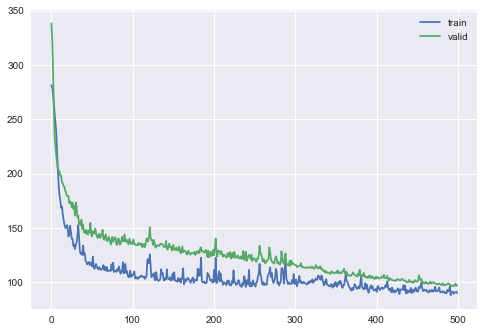

In [109]:
history = model.fit(train_1, labels_1, nb_epoch=500, batch_size=256,validation_data=(test_1, test_labels_1), verbose=2,shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(24,8))
train_predict = model.predict(train_1)
valid_predict = model.predict(test_1)
#test_predict = model.predict(test_X)
plt.plot(labels[:-420], c='b')
plt.plot([x for x in train_predict], c='g')
plt.plot([None for _ in train_predict] + [x for x in valid_predict], c='y')
#plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [44]:
model.save('my_model_08.h5')   # HDF5 file, you have to pip3 install h5py if don't have it

In [110]:
pred_test_labels_1=model.predict(test_1)

In [111]:
math.sqrt(((pred_test_labels_1 - test_labels_1)**2).mean())

586.6158451221806

In [112]:
pred=pred_test_labels_1.reshape(-1,)#这里被坑了好久，一直没有注意数据结构

In [113]:
test_labels_1.shape

(140,)

In [114]:
math.sqrt(((pred - test_labels_1)**2).mean())

160.39196672049567

In [118]:
pred.astype(int)

array([ 304,  173,  252,  224,  137,  305,  399,  575,  182,  656,  492,
       1483,  504,  562,  144,  570,   10, 1450, 1473,  400,  212,  126,
        228,  231,  160,  321,  414,  248,  525,  464,  452,  544,  224,
        286,  236,  524, 2845,  438,  362,  572,  113,  130,  260,  412,
        215,  685,   67,  372, 2526,  193,  162,  117,  307,   83,  160,
         81,  136, 1336,  328,  188,  313,  126,  256,  456,  339,  342,
        901,  238,  234,  482,  117,  289,  556,  263,  363,  947,  413,
        990,  287,  465,  151,  535,  283, 1485,  906,  127,   69,   44,
        435,  235,  164,  322,  142,  677,  151,  407,  190,  283,   99,
        187,  236,  176,  119,  222,  586,  219,  306,   45,  204,  435,
         31,   98,  121,  136,   95,   92,  135,  248,  112,   48,  171,
        613,  134,   42,   74,  202,  104,   59,  242,  204,    8,   19,
         16,   64,   19,    1,    3,    3,    5,    0])

In [140]:
model2 = Sequential()
# model.add(LSTM(
#     batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
#     output_dim=CELL_SIZE,
#     return_sequences=True,      # True: output at all steps. False: output as last step.
#     stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
# ))
model2.add(LSTM(64, input_shape=(train_2.shape[1],train_2.shape[2])))
model2.add(Dropout(.1))
model2.add(Dense(64))
model2.add(Dropout(.2))
model2.add(Dense(16))
model2.add(Dropout(.2))
model2.add(Dense(1))
model2.compile(loss = rmse_loss, optimizer='adam', metrics=['mse'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                52736     
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_36 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total para

Train on 7840 samples, validate on 140 samples
Epoch 1/2000
 - 0s - loss: 140.0651 - mean_squared_error: 86472.0238 - val_loss: 182.3728 - val_mean_squared_error: 104471.1406
Epoch 2/2000
 - 0s - loss: 134.9988 - mean_squared_error: 84377.6924 - val_loss: 174.8070 - val_mean_squared_error: 96245.0391
Epoch 3/2000
 - 0s - loss: 121.7104 - mean_squared_error: 78829.5053 - val_loss: 181.0042 - val_mean_squared_error: 99663.1406
Epoch 4/2000
 - 0s - loss: 119.1761 - mean_squared_error: 77888.9332 - val_loss: 179.7535 - val_mean_squared_error: 98761.5000
Epoch 5/2000
 - 0s - loss: 122.4280 - mean_squared_error: 80780.7868 - val_loss: 185.5849 - val_mean_squared_error: 100432.2578
Epoch 6/2000
 - 0s - loss: 122.8566 - mean_squared_error: 77851.7756 - val_loss: 190.1665 - val_mean_squared_error: 101489.1250
Epoch 7/2000
 - 0s - loss: 118.4529 - mean_squared_error: 76304.6694 - val_loss: 190.6023 - val_mean_squared_error: 100419.6016
Epoch 8/2000
 - 0s - loss: 118.1132 - mean_squared_error: 74

Epoch 65/2000
 - 0s - loss: 106.6317 - mean_squared_error: 60184.7798 - val_loss: 149.4648 - val_mean_squared_error: 63028.8867
Epoch 66/2000
 - 0s - loss: 106.7259 - mean_squared_error: 60444.8718 - val_loss: 143.5953 - val_mean_squared_error: 60180.0000
Epoch 67/2000
 - 0s - loss: 104.3726 - mean_squared_error: 59943.8339 - val_loss: 146.7579 - val_mean_squared_error: 61768.2578
Epoch 68/2000
 - 0s - loss: 105.2708 - mean_squared_error: 60367.7461 - val_loss: 148.6809 - val_mean_squared_error: 62061.1289
Epoch 69/2000
 - 0s - loss: 105.0971 - mean_squared_error: 56495.8421 - val_loss: 148.3087 - val_mean_squared_error: 62345.9727
Epoch 70/2000
 - 0s - loss: 104.7906 - mean_squared_error: 60640.4351 - val_loss: 146.2268 - val_mean_squared_error: 60958.9648
Epoch 71/2000
 - 0s - loss: 104.3646 - mean_squared_error: 58601.6190 - val_loss: 146.4539 - val_mean_squared_error: 61017.0430
Epoch 72/2000
 - 0s - loss: 104.0641 - mean_squared_error: 57311.7392 - val_loss: 155.4682 - val_mean_sq

Epoch 129/2000
 - 0s - loss: 101.6763 - mean_squared_error: 58548.1512 - val_loss: 129.7971 - val_mean_squared_error: 50234.5312
Epoch 130/2000
 - 0s - loss: 101.6461 - mean_squared_error: 54088.9243 - val_loss: 132.0074 - val_mean_squared_error: 51016.8633
Epoch 131/2000
 - 0s - loss: 104.5913 - mean_squared_error: 56770.4816 - val_loss: 135.5180 - val_mean_squared_error: 51025.7031
Epoch 132/2000
 - 0s - loss: 106.9625 - mean_squared_error: 55279.1386 - val_loss: 142.4935 - val_mean_squared_error: 54394.0938
Epoch 133/2000
 - 0s - loss: 108.1463 - mean_squared_error: 56249.3908 - val_loss: 141.0851 - val_mean_squared_error: 51671.4375
Epoch 134/2000
 - 0s - loss: 116.6806 - mean_squared_error: 58528.6746 - val_loss: 126.4449 - val_mean_squared_error: 46790.0820
Epoch 135/2000
 - 0s - loss: 113.2543 - mean_squared_error: 54940.2675 - val_loss: 127.0731 - val_mean_squared_error: 46779.4922
Epoch 136/2000
 - 0s - loss: 105.6628 - mean_squared_error: 57413.1564 - val_loss: 132.0273 - val

Epoch 193/2000
 - 0s - loss: 107.0240 - mean_squared_error: 54056.2615 - val_loss: 122.4537 - val_mean_squared_error: 46904.9414
Epoch 194/2000
 - 0s - loss: 101.1005 - mean_squared_error: 56190.2677 - val_loss: 120.8081 - val_mean_squared_error: 44804.8594
Epoch 195/2000
 - 0s - loss: 105.0548 - mean_squared_error: 55731.9873 - val_loss: 122.4957 - val_mean_squared_error: 46138.9219
Epoch 196/2000
 - 0s - loss: 109.1050 - mean_squared_error: 56644.0418 - val_loss: 121.5771 - val_mean_squared_error: 46447.6211
Epoch 197/2000
 - 0s - loss: 113.1893 - mean_squared_error: 58423.4264 - val_loss: 123.4597 - val_mean_squared_error: 48031.1914
Epoch 198/2000
 - 0s - loss: 107.9791 - mean_squared_error: 57005.5354 - val_loss: 133.5633 - val_mean_squared_error: 54446.6289
Epoch 199/2000
 - 0s - loss: 106.9480 - mean_squared_error: 56115.3551 - val_loss: 122.1197 - val_mean_squared_error: 45935.5859
Epoch 200/2000
 - 0s - loss: 116.2608 - mean_squared_error: 58614.4882 - val_loss: 130.4353 - val

Epoch 257/2000
 - 0s - loss: 92.6381 - mean_squared_error: 48606.5401 - val_loss: 117.3759 - val_mean_squared_error: 36615.5195
Epoch 258/2000
 - 0s - loss: 92.7543 - mean_squared_error: 48409.3337 - val_loss: 113.9916 - val_mean_squared_error: 34620.6797
Epoch 259/2000
 - 0s - loss: 91.9860 - mean_squared_error: 48458.0145 - val_loss: 115.8882 - val_mean_squared_error: 35109.6367
Epoch 260/2000
 - 0s - loss: 92.2749 - mean_squared_error: 47582.3001 - val_loss: 112.4666 - val_mean_squared_error: 34270.6484
Epoch 261/2000
 - 0s - loss: 91.9308 - mean_squared_error: 48259.3750 - val_loss: 113.7940 - val_mean_squared_error: 34832.8086
Epoch 262/2000
 - 0s - loss: 92.1842 - mean_squared_error: 47469.7309 - val_loss: 114.0019 - val_mean_squared_error: 34999.4648
Epoch 263/2000
 - 0s - loss: 93.0884 - mean_squared_error: 49326.8534 - val_loss: 113.8819 - val_mean_squared_error: 34106.1641
Epoch 264/2000
 - 0s - loss: 92.1060 - mean_squared_error: 49726.9650 - val_loss: 114.4196 - val_mean_sq

 - 0s - loss: 92.7909 - mean_squared_error: 48828.4472 - val_loss: 103.9053 - val_mean_squared_error: 29013.4961
Epoch 322/2000
 - 0s - loss: 92.1692 - mean_squared_error: 45659.0615 - val_loss: 103.4699 - val_mean_squared_error: 28647.3223
Epoch 323/2000
 - 0s - loss: 91.2526 - mean_squared_error: 47782.3194 - val_loss: 101.8808 - val_mean_squared_error: 27880.2812
Epoch 324/2000
 - 0s - loss: 93.7837 - mean_squared_error: 51223.4588 - val_loss: 103.2446 - val_mean_squared_error: 29379.0508
Epoch 325/2000
 - 0s - loss: 90.9889 - mean_squared_error: 47612.8869 - val_loss: 102.6513 - val_mean_squared_error: 28570.4141
Epoch 326/2000
 - 0s - loss: 92.1729 - mean_squared_error: 46323.2362 - val_loss: 103.3765 - val_mean_squared_error: 28850.2324
Epoch 327/2000
 - 0s - loss: 92.1054 - mean_squared_error: 48511.1298 - val_loss: 101.0638 - val_mean_squared_error: 27125.9902
Epoch 328/2000
 - 0s - loss: 92.8349 - mean_squared_error: 47243.1439 - val_loss: 101.9463 - val_mean_squared_error: 28

Epoch 386/2000
 - 0s - loss: 90.3712 - mean_squared_error: 45909.9991 - val_loss: 107.9164 - val_mean_squared_error: 30412.7461
Epoch 387/2000
 - 0s - loss: 89.2396 - mean_squared_error: 46633.3748 - val_loss: 105.4143 - val_mean_squared_error: 28871.3945
Epoch 388/2000
 - 0s - loss: 87.4523 - mean_squared_error: 44765.1429 - val_loss: 104.5940 - val_mean_squared_error: 28772.5059
Epoch 389/2000
 - 0s - loss: 87.9021 - mean_squared_error: 45359.7675 - val_loss: 104.1552 - val_mean_squared_error: 28565.2070
Epoch 390/2000
 - 0s - loss: 86.9784 - mean_squared_error: 43811.0948 - val_loss: 103.5233 - val_mean_squared_error: 28246.4199
Epoch 391/2000
 - 0s - loss: 87.6584 - mean_squared_error: 46822.3109 - val_loss: 102.4278 - val_mean_squared_error: 28497.2227
Epoch 392/2000
 - 0s - loss: 88.6586 - mean_squared_error: 47425.2672 - val_loss: 103.2275 - val_mean_squared_error: 28638.8574
Epoch 393/2000
 - 0s - loss: 88.5600 - mean_squared_error: 45276.0962 - val_loss: 103.2252 - val_mean_sq

 - 0s - loss: 92.3576 - mean_squared_error: 45414.7339 - val_loss: 100.1005 - val_mean_squared_error: 25627.0586
Epoch 451/2000
 - 0s - loss: 91.2735 - mean_squared_error: 49291.0538 - val_loss: 101.4253 - val_mean_squared_error: 26393.6973
Epoch 452/2000
 - 0s - loss: 88.8151 - mean_squared_error: 45427.2386 - val_loss: 100.4572 - val_mean_squared_error: 26164.1348
Epoch 453/2000
 - 0s - loss: 86.1695 - mean_squared_error: 45631.1213 - val_loss: 100.1590 - val_mean_squared_error: 26131.8359
Epoch 454/2000
 - 0s - loss: 87.3623 - mean_squared_error: 47117.1339 - val_loss: 103.2619 - val_mean_squared_error: 26724.2090
Epoch 455/2000
 - 0s - loss: 88.8460 - mean_squared_error: 48402.6440 - val_loss: 103.9832 - val_mean_squared_error: 26750.4258
Epoch 456/2000
 - 0s - loss: 89.4023 - mean_squared_error: 48445.4716 - val_loss: 102.1435 - val_mean_squared_error: 26702.9824
Epoch 457/2000
 - 0s - loss: 87.7453 - mean_squared_error: 43581.9931 - val_loss: 101.6182 - val_mean_squared_error: 26

Epoch 515/2000
 - 0s - loss: 86.2089 - mean_squared_error: 44476.1953 - val_loss: 113.2358 - val_mean_squared_error: 29463.2422
Epoch 516/2000
 - 0s - loss: 89.0643 - mean_squared_error: 44469.1569 - val_loss: 108.7558 - val_mean_squared_error: 28020.8223
Epoch 517/2000
 - 0s - loss: 88.0414 - mean_squared_error: 45359.0864 - val_loss: 107.4180 - val_mean_squared_error: 27758.9062
Epoch 518/2000
 - 0s - loss: 86.6868 - mean_squared_error: 43960.7711 - val_loss: 106.7497 - val_mean_squared_error: 27650.1719
Epoch 519/2000
 - 0s - loss: 86.5997 - mean_squared_error: 42727.5383 - val_loss: 119.7115 - val_mean_squared_error: 30929.6152
Epoch 520/2000
 - 0s - loss: 86.8560 - mean_squared_error: 44362.1603 - val_loss: 112.8285 - val_mean_squared_error: 28853.5117
Epoch 521/2000
 - 0s - loss: 87.4722 - mean_squared_error: 44362.7280 - val_loss: 106.2672 - val_mean_squared_error: 27344.6094
Epoch 522/2000
 - 0s - loss: 89.6002 - mean_squared_error: 48074.2787 - val_loss: 104.8604 - val_mean_sq

 - 0s - loss: 91.7610 - mean_squared_error: 45418.3375 - val_loss: 101.8672 - val_mean_squared_error: 25897.9199
Epoch 580/2000
 - 0s - loss: 91.0358 - mean_squared_error: 48540.7500 - val_loss: 97.3904 - val_mean_squared_error: 23870.7637
Epoch 581/2000
 - 0s - loss: 90.7488 - mean_squared_error: 45363.6344 - val_loss: 100.8509 - val_mean_squared_error: 25157.7090
Epoch 582/2000
 - 0s - loss: 92.4999 - mean_squared_error: 47789.8906 - val_loss: 97.9033 - val_mean_squared_error: 24120.7402
Epoch 583/2000
 - 0s - loss: 90.3585 - mean_squared_error: 47286.6375 - val_loss: 100.4697 - val_mean_squared_error: 25089.9023
Epoch 584/2000
 - 0s - loss: 96.1831 - mean_squared_error: 49316.4290 - val_loss: 98.9424 - val_mean_squared_error: 24820.2773
Epoch 585/2000
 - 0s - loss: 92.0725 - mean_squared_error: 45953.2854 - val_loss: 99.7811 - val_mean_squared_error: 24461.6152
Epoch 586/2000
 - 0s - loss: 90.9269 - mean_squared_error: 47280.4770 - val_loss: 98.4437 - val_mean_squared_error: 24353.7

Epoch 655/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 656/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 657/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 658/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 659/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 660/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 661/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 662/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 663/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 664/2000
 - 0s - loss: nan - mean_squared_error: 

 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 734/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 735/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 736/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 737/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 738/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 739/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 740/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 741/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 742/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss:

Epoch 812/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 813/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 814/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 815/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 816/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 817/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 818/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 819/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 820/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 821/2000
 - 0s - loss: nan - mean_squared_error: 

 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 891/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 892/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 893/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 894/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 895/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 896/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 897/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 898/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 899/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss:

Epoch 969/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 970/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 971/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 972/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 973/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 974/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 975/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 976/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 977/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 978/2000
 - 0s - loss: nan - mean_squared_error: 

Epoch 1047/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1048/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1049/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1050/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1051/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1052/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1053/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1054/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1055/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1056/2000
 - 0s - loss: nan - mean_squar

Epoch 1125/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1126/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1127/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1128/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1129/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1130/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1131/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1132/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1133/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1134/2000
 - 0s - loss: nan - mean_squar

Epoch 1203/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1204/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1205/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1206/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1207/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1208/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1209/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1210/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1211/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1212/2000
 - 0s - loss: nan - mean_squar

Epoch 1281/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1282/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1283/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1284/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1285/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1286/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1287/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1288/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1289/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1290/2000
 - 0s - loss: nan - mean_squar

Epoch 1359/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1360/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1361/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1362/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1363/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1364/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1365/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1366/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1367/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1368/2000
 - 0s - loss: nan - mean_squar

Epoch 1437/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1438/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1439/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1440/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1441/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1442/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1443/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1444/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1445/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1446/2000
 - 0s - loss: nan - mean_squar

Epoch 1515/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1516/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1517/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1518/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1519/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1520/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1521/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1522/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1523/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1524/2000
 - 0s - loss: nan - mean_squar

Epoch 1593/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1594/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1595/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1596/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1597/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1598/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1599/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1600/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1601/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1602/2000
 - 0s - loss: nan - mean_squar

Epoch 1671/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1672/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1673/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1674/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1675/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1676/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1677/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1678/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1679/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1680/2000
 - 0s - loss: nan - mean_squar

Epoch 1749/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1750/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1751/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1752/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1753/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1754/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1755/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1756/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1757/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1758/2000
 - 0s - loss: nan - mean_squar

Epoch 1827/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1828/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1829/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1830/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1831/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1832/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1833/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1834/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1835/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1836/2000
 - 0s - loss: nan - mean_squar

Epoch 1905/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1906/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1907/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1908/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1909/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1910/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1911/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1912/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1913/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1914/2000
 - 0s - loss: nan - mean_squar

Epoch 1983/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1984/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1985/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1986/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1987/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1988/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1989/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1990/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1991/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1992/2000
 - 0s - loss: nan - mean_squar

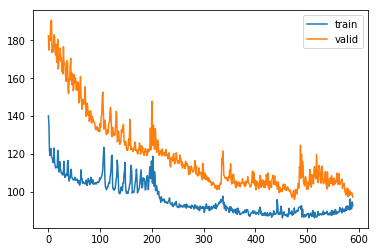

In [142]:
history2 = model2.fit(train_2, labels_2, nb_epoch=2000, batch_size=256,validation_data=(test_2, test_labels_2), verbose=2,shuffle=False)
# plot history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(24,8))
train_predict2 = model2.predict(train_2)
valid_predict2 = model2.predict(test_2)
#test_predict = model.predict(test_X)
plt.plot(labels[:-280], c='b')
plt.plot([x for x in train_predict2], c='g')
plt.plot([None for _ in train_predict2] + [x for x in valid_predict2], c='y')
#plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [66]:
pred_test_labels_2=model2.predict(test_2)
math.sqrt(((pred_test_labels_2.reshape(-1,) - test_labels_2)**2).mean())

nan

In [94]:
model3 = Sequential()
# model.add(LSTM(
#     batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
#     output_dim=CELL_SIZE,
#     return_sequences=True,      # True: output at all steps. False: output as last step.
#     stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
# ))
model3.add(LSTM(64, input_shape=(train_3.shape[1],train_3.shape[2])))
model3.add(Dropout(.5))
model3.add(Dense(64))
model3.add(Dropout(.5))
model3.add(Dense(16))
model3.add(Dropout(.5))
model3.add(Dense(1))
model3.compile(loss ='mse', optimizer='adam', metrics=['mse'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                52736     
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_33 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total para

Train on 7980 samples, validate on 140 samples
Epoch 1/1000
 - 0s - loss: 58584.7291 - mean_squared_error: 58584.7291 - val_loss: 26212.9512 - val_mean_squared_error: 26212.9512
Epoch 2/1000
 - 0s - loss: 51378.0374 - mean_squared_error: 51378.0374 - val_loss: 26226.3223 - val_mean_squared_error: 26226.3223
Epoch 3/1000
 - 0s - loss: 56009.1934 - mean_squared_error: 56009.1934 - val_loss: 25785.4902 - val_mean_squared_error: 25785.4902
Epoch 4/1000
 - 0s - loss: 56868.1471 - mean_squared_error: 56868.1471 - val_loss: 25845.1543 - val_mean_squared_error: 25845.1543
Epoch 5/1000
 - 0s - loss: 56077.7988 - mean_squared_error: 56077.7988 - val_loss: 26064.3027 - val_mean_squared_error: 26064.3027
Epoch 6/1000
 - 0s - loss: 54806.2034 - mean_squared_error: 54806.2034 - val_loss: 25894.9473 - val_mean_squared_error: 25894.9473
Epoch 7/1000
 - 0s - loss: 57206.8988 - mean_squared_error: 57206.8988 - val_loss: 25554.6172 - val_mean_squared_error: 25554.6172
Epoch 8/1000
 - 0s - loss: 58954.751

Epoch 63/1000
 - 0s - loss: 57692.4014 - mean_squared_error: 57692.4014 - val_loss: 25351.8418 - val_mean_squared_error: 25351.8418
Epoch 64/1000
 - 0s - loss: 57427.5695 - mean_squared_error: 57427.5695 - val_loss: 25413.1543 - val_mean_squared_error: 25413.1543
Epoch 65/1000
 - 0s - loss: 63047.9374 - mean_squared_error: 63047.9374 - val_loss: 25791.7109 - val_mean_squared_error: 25791.7109
Epoch 66/1000
 - 0s - loss: 56709.0005 - mean_squared_error: 56709.0005 - val_loss: 25575.0996 - val_mean_squared_error: 25575.0996
Epoch 67/1000
 - 0s - loss: 52813.0739 - mean_squared_error: 52813.0739 - val_loss: 25055.6465 - val_mean_squared_error: 25055.6465
Epoch 68/1000
 - 0s - loss: 58175.7381 - mean_squared_error: 58175.7381 - val_loss: 25071.5352 - val_mean_squared_error: 25071.5352
Epoch 69/1000
 - 0s - loss: 58671.6998 - mean_squared_error: 58671.6998 - val_loss: 25179.6895 - val_mean_squared_error: 25179.6895
Epoch 70/1000
 - 0s - loss: 55319.1034 - mean_squared_error: 55319.1034 - va

Epoch 125/1000
 - 0s - loss: 54771.1079 - mean_squared_error: 54771.1079 - val_loss: 26149.7344 - val_mean_squared_error: 26149.7344
Epoch 126/1000
 - 0s - loss: 55732.7524 - mean_squared_error: 55732.7524 - val_loss: 26278.7324 - val_mean_squared_error: 26278.7324
Epoch 127/1000
 - 0s - loss: 58657.2815 - mean_squared_error: 58657.2815 - val_loss: 25741.8867 - val_mean_squared_error: 25741.8867
Epoch 128/1000
 - 0s - loss: 56525.7455 - mean_squared_error: 56525.7455 - val_loss: 25544.0469 - val_mean_squared_error: 25544.0469
Epoch 129/1000
 - 0s - loss: 52241.5260 - mean_squared_error: 52241.5260 - val_loss: 25844.7578 - val_mean_squared_error: 25844.7578
Epoch 130/1000
 - 0s - loss: 60179.2729 - mean_squared_error: 60179.2729 - val_loss: 26021.5723 - val_mean_squared_error: 26021.5723
Epoch 131/1000
 - 0s - loss: 59529.1784 - mean_squared_error: 59529.1784 - val_loss: 26133.7402 - val_mean_squared_error: 26133.7402
Epoch 132/1000
 - 0s - loss: 58179.7815 - mean_squared_error: 58179.7

Epoch 187/1000
 - 0s - loss: 55429.5747 - mean_squared_error: 55429.5747 - val_loss: 25797.9648 - val_mean_squared_error: 25797.9648
Epoch 188/1000
 - 0s - loss: 52532.0089 - mean_squared_error: 52532.0089 - val_loss: 25740.5117 - val_mean_squared_error: 25740.5117
Epoch 189/1000
 - 0s - loss: 57788.3184 - mean_squared_error: 57788.3184 - val_loss: 25591.1211 - val_mean_squared_error: 25591.1211
Epoch 190/1000
 - 0s - loss: 54290.3647 - mean_squared_error: 54290.3647 - val_loss: 25884.5605 - val_mean_squared_error: 25884.5605
Epoch 191/1000
 - 0s - loss: 56795.1325 - mean_squared_error: 56795.1325 - val_loss: 25757.2539 - val_mean_squared_error: 25757.2539
Epoch 192/1000
 - 0s - loss: 54788.6481 - mean_squared_error: 54788.6481 - val_loss: 25487.6074 - val_mean_squared_error: 25487.6074
Epoch 193/1000
 - 0s - loss: 53951.6681 - mean_squared_error: 53951.6681 - val_loss: 25407.1348 - val_mean_squared_error: 25407.1348
Epoch 194/1000
 - 0s - loss: 51306.7353 - mean_squared_error: 51306.7

Epoch 249/1000
 - 0s - loss: 53418.8267 - mean_squared_error: 53418.8267 - val_loss: 25141.8516 - val_mean_squared_error: 25141.8516
Epoch 250/1000
 - 0s - loss: 54798.3059 - mean_squared_error: 54798.3059 - val_loss: 25874.0703 - val_mean_squared_error: 25874.0703
Epoch 251/1000
 - 0s - loss: 59269.9559 - mean_squared_error: 59269.9559 - val_loss: 26163.6152 - val_mean_squared_error: 26163.6152
Epoch 252/1000
 - 0s - loss: 57883.4588 - mean_squared_error: 57883.4588 - val_loss: 26351.6035 - val_mean_squared_error: 26351.6035
Epoch 253/1000
 - 0s - loss: 49393.1531 - mean_squared_error: 49393.1531 - val_loss: 25436.9688 - val_mean_squared_error: 25436.9688
Epoch 254/1000
 - 0s - loss: 61436.3011 - mean_squared_error: 61436.3011 - val_loss: 24776.8594 - val_mean_squared_error: 24776.8594
Epoch 255/1000
 - 0s - loss: 55798.9370 - mean_squared_error: 55798.9370 - val_loss: 24860.0859 - val_mean_squared_error: 24860.0859
Epoch 256/1000
 - 0s - loss: 53163.2363 - mean_squared_error: 53163.2

Epoch 311/1000
 - 0s - loss: 58057.9121 - mean_squared_error: 58057.9121 - val_loss: 26434.3535 - val_mean_squared_error: 26434.3535
Epoch 312/1000
 - 0s - loss: 54637.0112 - mean_squared_error: 54637.0112 - val_loss: 25775.3652 - val_mean_squared_error: 25775.3652
Epoch 313/1000
 - 0s - loss: 55995.1563 - mean_squared_error: 55995.1563 - val_loss: 25092.8438 - val_mean_squared_error: 25092.8438
Epoch 314/1000
 - 0s - loss: 58350.2719 - mean_squared_error: 58350.2719 - val_loss: 25084.9980 - val_mean_squared_error: 25084.9980
Epoch 315/1000
 - 0s - loss: 56524.3797 - mean_squared_error: 56524.3797 - val_loss: 26203.1289 - val_mean_squared_error: 26203.1289
Epoch 316/1000
 - 0s - loss: 55715.3961 - mean_squared_error: 55715.3961 - val_loss: 27040.1074 - val_mean_squared_error: 27040.1074
Epoch 317/1000
 - 0s - loss: 58399.5555 - mean_squared_error: 58399.5555 - val_loss: 26332.0391 - val_mean_squared_error: 26332.0391
Epoch 318/1000
 - 0s - loss: 54956.0494 - mean_squared_error: 54956.0

Epoch 373/1000
 - 0s - loss: 58885.8211 - mean_squared_error: 58885.8211 - val_loss: 25406.8477 - val_mean_squared_error: 25406.8477
Epoch 374/1000
 - 0s - loss: 54746.0470 - mean_squared_error: 54746.0470 - val_loss: 25447.8496 - val_mean_squared_error: 25447.8496
Epoch 375/1000
 - 0s - loss: 60012.8300 - mean_squared_error: 60012.8300 - val_loss: 25879.8926 - val_mean_squared_error: 25879.8926
Epoch 376/1000
 - 0s - loss: 56059.8857 - mean_squared_error: 56059.8857 - val_loss: 25704.8223 - val_mean_squared_error: 25704.8223
Epoch 377/1000
 - 0s - loss: 55435.7563 - mean_squared_error: 55435.7563 - val_loss: 25111.2812 - val_mean_squared_error: 25111.2812
Epoch 378/1000
 - 0s - loss: 59180.4586 - mean_squared_error: 59180.4586 - val_loss: 24946.1230 - val_mean_squared_error: 24946.1230
Epoch 379/1000
 - 0s - loss: 55399.5793 - mean_squared_error: 55399.5793 - val_loss: 25493.5723 - val_mean_squared_error: 25493.5723
Epoch 380/1000
 - 0s - loss: 53647.4444 - mean_squared_error: 53647.4

Epoch 435/1000
 - 0s - loss: 59927.7256 - mean_squared_error: 59927.7256 - val_loss: 25425.9785 - val_mean_squared_error: 25425.9785
Epoch 436/1000
 - 0s - loss: 56074.6616 - mean_squared_error: 56074.6616 - val_loss: 25944.4688 - val_mean_squared_error: 25944.4688
Epoch 437/1000
 - 0s - loss: 58834.5581 - mean_squared_error: 58834.5581 - val_loss: 26730.7441 - val_mean_squared_error: 26730.7441
Epoch 438/1000
 - 0s - loss: 58390.7293 - mean_squared_error: 58390.7293 - val_loss: 26800.4668 - val_mean_squared_error: 26800.4668
Epoch 439/1000
 - 0s - loss: 56579.6297 - mean_squared_error: 56579.6297 - val_loss: 26062.4883 - val_mean_squared_error: 26062.4883
Epoch 440/1000
 - 0s - loss: 52857.7779 - mean_squared_error: 52857.7779 - val_loss: 25361.5840 - val_mean_squared_error: 25361.5840
Epoch 441/1000
 - 0s - loss: 54094.7429 - mean_squared_error: 54094.7429 - val_loss: 25627.4863 - val_mean_squared_error: 25627.4863
Epoch 442/1000
 - 0s - loss: 58594.8857 - mean_squared_error: 58594.8

Epoch 497/1000
 - 0s - loss: 57160.0904 - mean_squared_error: 57160.0904 - val_loss: 26278.8555 - val_mean_squared_error: 26278.8555
Epoch 498/1000
 - 0s - loss: 58435.4664 - mean_squared_error: 58435.4664 - val_loss: 25556.9883 - val_mean_squared_error: 25556.9883
Epoch 499/1000
 - 0s - loss: 56494.7932 - mean_squared_error: 56494.7932 - val_loss: 25431.0176 - val_mean_squared_error: 25431.0176
Epoch 500/1000
 - 0s - loss: 52598.7747 - mean_squared_error: 52598.7747 - val_loss: 25916.7246 - val_mean_squared_error: 25916.7246
Epoch 501/1000
 - 0s - loss: 55710.2145 - mean_squared_error: 55710.2145 - val_loss: 26248.1738 - val_mean_squared_error: 26248.1738
Epoch 502/1000
 - 0s - loss: 52979.6479 - mean_squared_error: 52979.6479 - val_loss: 26362.7363 - val_mean_squared_error: 26362.7363
Epoch 503/1000
 - 0s - loss: 56101.4162 - mean_squared_error: 56101.4162 - val_loss: 25787.4980 - val_mean_squared_error: 25787.4980
Epoch 504/1000
 - 0s - loss: 51010.4557 - mean_squared_error: 51010.4

Epoch 559/1000
 - 0s - loss: 58270.1420 - mean_squared_error: 58270.1420 - val_loss: 26008.5742 - val_mean_squared_error: 26008.5742
Epoch 560/1000
 - 0s - loss: 57363.3423 - mean_squared_error: 57363.3423 - val_loss: 26016.1660 - val_mean_squared_error: 26016.1660
Epoch 561/1000
 - 0s - loss: 57333.7616 - mean_squared_error: 57333.7616 - val_loss: 26748.3555 - val_mean_squared_error: 26748.3555
Epoch 562/1000
 - 0s - loss: 53898.4419 - mean_squared_error: 53898.4419 - val_loss: 26700.0371 - val_mean_squared_error: 26700.0371
Epoch 563/1000
 - 0s - loss: 64072.3155 - mean_squared_error: 64072.3155 - val_loss: 26020.1348 - val_mean_squared_error: 26020.1348
Epoch 564/1000
 - 0s - loss: 56021.0717 - mean_squared_error: 56021.0717 - val_loss: 26525.2598 - val_mean_squared_error: 26525.2598
Epoch 565/1000
 - 0s - loss: 65352.3888 - mean_squared_error: 65352.3888 - val_loss: 26963.4492 - val_mean_squared_error: 26963.4492
Epoch 566/1000
 - 0s - loss: 55653.3831 - mean_squared_error: 55653.3

Epoch 621/1000
 - 0s - loss: 51748.2096 - mean_squared_error: 51748.2096 - val_loss: 25451.1582 - val_mean_squared_error: 25451.1582
Epoch 622/1000
 - 0s - loss: 57092.9813 - mean_squared_error: 57092.9813 - val_loss: 25254.5801 - val_mean_squared_error: 25254.5801
Epoch 623/1000
 - 0s - loss: 59247.3151 - mean_squared_error: 59247.3151 - val_loss: 25473.5586 - val_mean_squared_error: 25473.5586
Epoch 624/1000
 - 0s - loss: 54457.6934 - mean_squared_error: 54457.6934 - val_loss: 26165.7598 - val_mean_squared_error: 26165.7598
Epoch 625/1000
 - 0s - loss: 62968.5545 - mean_squared_error: 62968.5545 - val_loss: 26436.3848 - val_mean_squared_error: 26436.3848
Epoch 626/1000
 - 0s - loss: 53622.0600 - mean_squared_error: 53622.0600 - val_loss: 26801.9766 - val_mean_squared_error: 26801.9766
Epoch 627/1000
 - 0s - loss: 54799.9087 - mean_squared_error: 54799.9087 - val_loss: 26521.4434 - val_mean_squared_error: 26521.4434
Epoch 628/1000
 - 0s - loss: 57529.2197 - mean_squared_error: 57529.2

Epoch 683/1000
 - 0s - loss: 54707.8640 - mean_squared_error: 54707.8640 - val_loss: 26352.0039 - val_mean_squared_error: 26352.0039
Epoch 684/1000
 - 0s - loss: 50008.5099 - mean_squared_error: 50008.5099 - val_loss: 26839.1582 - val_mean_squared_error: 26839.1582
Epoch 685/1000
 - 0s - loss: 58343.3417 - mean_squared_error: 58343.3417 - val_loss: 26608.6602 - val_mean_squared_error: 26608.6602
Epoch 686/1000
 - 0s - loss: 56282.9008 - mean_squared_error: 56282.9008 - val_loss: 26100.6992 - val_mean_squared_error: 26100.6992
Epoch 687/1000
 - 0s - loss: 54831.0354 - mean_squared_error: 54831.0354 - val_loss: 25529.0840 - val_mean_squared_error: 25529.0840
Epoch 688/1000
 - 0s - loss: 57371.6345 - mean_squared_error: 57371.6345 - val_loss: 25908.2383 - val_mean_squared_error: 25908.2383
Epoch 689/1000
 - 0s - loss: 58331.7253 - mean_squared_error: 58331.7253 - val_loss: 27132.5020 - val_mean_squared_error: 27132.5020
Epoch 690/1000
 - 0s - loss: 60528.4068 - mean_squared_error: 60528.4

Epoch 745/1000
 - 0s - loss: 57682.7241 - mean_squared_error: 57682.7241 - val_loss: 26995.3145 - val_mean_squared_error: 26995.3145
Epoch 746/1000
 - 0s - loss: 56634.7234 - mean_squared_error: 56634.7234 - val_loss: 26792.0078 - val_mean_squared_error: 26792.0078
Epoch 747/1000
 - 0s - loss: 57613.1352 - mean_squared_error: 57613.1352 - val_loss: 26698.0723 - val_mean_squared_error: 26698.0723
Epoch 748/1000
 - 0s - loss: 53504.0387 - mean_squared_error: 53504.0387 - val_loss: 26104.6621 - val_mean_squared_error: 26104.6621
Epoch 749/1000
 - 0s - loss: 55161.6115 - mean_squared_error: 55161.6115 - val_loss: 25527.6758 - val_mean_squared_error: 25527.6758
Epoch 750/1000
 - 0s - loss: 54796.9214 - mean_squared_error: 54796.9214 - val_loss: 25352.2070 - val_mean_squared_error: 25352.2070
Epoch 751/1000
 - 0s - loss: 56778.1070 - mean_squared_error: 56778.1070 - val_loss: 26162.0410 - val_mean_squared_error: 26162.0410
Epoch 752/1000
 - 0s - loss: 55946.8729 - mean_squared_error: 55946.8

Epoch 807/1000
 - 0s - loss: 57646.1489 - mean_squared_error: 57646.1489 - val_loss: 26136.4570 - val_mean_squared_error: 26136.4570
Epoch 808/1000
 - 0s - loss: 53197.5628 - mean_squared_error: 53197.5628 - val_loss: 25888.5938 - val_mean_squared_error: 25888.5938
Epoch 809/1000
 - 0s - loss: 58831.2154 - mean_squared_error: 58831.2154 - val_loss: 25403.4473 - val_mean_squared_error: 25403.4473
Epoch 810/1000
 - 0s - loss: 53515.3662 - mean_squared_error: 53515.3662 - val_loss: 25552.6719 - val_mean_squared_error: 25552.6719
Epoch 811/1000
 - 0s - loss: 52435.9822 - mean_squared_error: 52435.9822 - val_loss: 25608.0078 - val_mean_squared_error: 25608.0078
Epoch 812/1000
 - 0s - loss: 56879.0872 - mean_squared_error: 56879.0872 - val_loss: 25579.5645 - val_mean_squared_error: 25579.5645
Epoch 813/1000
 - 0s - loss: 61637.9661 - mean_squared_error: 61637.9661 - val_loss: 26659.4277 - val_mean_squared_error: 26659.4277
Epoch 814/1000
 - 0s - loss: 62139.4271 - mean_squared_error: 62139.4

Epoch 869/1000
 - 0s - loss: 54755.5387 - mean_squared_error: 54755.5387 - val_loss: 25668.1309 - val_mean_squared_error: 25668.1309
Epoch 870/1000
 - 0s - loss: 55868.4175 - mean_squared_error: 55868.4175 - val_loss: 26529.6914 - val_mean_squared_error: 26529.6914
Epoch 871/1000
 - 0s - loss: 57300.2555 - mean_squared_error: 57300.2555 - val_loss: 26957.3926 - val_mean_squared_error: 26957.3926
Epoch 872/1000
 - 0s - loss: 53761.6571 - mean_squared_error: 53761.6571 - val_loss: 26382.3984 - val_mean_squared_error: 26382.3984
Epoch 873/1000
 - 0s - loss: 57413.0391 - mean_squared_error: 57413.0391 - val_loss: 25403.9473 - val_mean_squared_error: 25403.9473
Epoch 874/1000
 - 0s - loss: 55933.9524 - mean_squared_error: 55933.9524 - val_loss: 25193.2109 - val_mean_squared_error: 25193.2109
Epoch 875/1000
 - 0s - loss: 54098.8008 - mean_squared_error: 54098.8008 - val_loss: 25748.6191 - val_mean_squared_error: 25748.6191
Epoch 876/1000
 - 0s - loss: 52620.9540 - mean_squared_error: 52620.9

Epoch 931/1000
 - 0s - loss: 52403.8948 - mean_squared_error: 52403.8948 - val_loss: 26068.8496 - val_mean_squared_error: 26068.8496
Epoch 932/1000
 - 0s - loss: 50577.2874 - mean_squared_error: 50577.2874 - val_loss: 26173.9668 - val_mean_squared_error: 26173.9668
Epoch 933/1000
 - 0s - loss: 56819.3154 - mean_squared_error: 56819.3154 - val_loss: 26160.4434 - val_mean_squared_error: 26160.4434
Epoch 934/1000
 - 0s - loss: 56217.1015 - mean_squared_error: 56217.1015 - val_loss: 26146.0469 - val_mean_squared_error: 26146.0469
Epoch 935/1000
 - 0s - loss: 56993.0748 - mean_squared_error: 56993.0748 - val_loss: 26040.2812 - val_mean_squared_error: 26040.2812
Epoch 936/1000
 - 0s - loss: 54891.0787 - mean_squared_error: 54891.0787 - val_loss: 26111.3086 - val_mean_squared_error: 26111.3086
Epoch 937/1000
 - 0s - loss: 50854.0778 - mean_squared_error: 50854.0778 - val_loss: 26033.2051 - val_mean_squared_error: 26033.2051
Epoch 938/1000
 - 0s - loss: 53666.5330 - mean_squared_error: 53666.5

Epoch 993/1000
 - 0s - loss: 57753.3055 - mean_squared_error: 57753.3055 - val_loss: 25730.3535 - val_mean_squared_error: 25730.3535
Epoch 994/1000
 - 0s - loss: 54472.4598 - mean_squared_error: 54472.4598 - val_loss: 26283.4688 - val_mean_squared_error: 26283.4688
Epoch 995/1000
 - 0s - loss: 55358.1385 - mean_squared_error: 55358.1385 - val_loss: 26920.1816 - val_mean_squared_error: 26920.1816
Epoch 996/1000
 - 0s - loss: 59312.3643 - mean_squared_error: 59312.3643 - val_loss: 27124.9824 - val_mean_squared_error: 27124.9824
Epoch 997/1000
 - 0s - loss: 56024.1270 - mean_squared_error: 56024.1270 - val_loss: 26370.8105 - val_mean_squared_error: 26370.8105
Epoch 998/1000
 - 0s - loss: 53568.4704 - mean_squared_error: 53568.4704 - val_loss: 26033.6992 - val_mean_squared_error: 26033.6992
Epoch 999/1000
 - 0s - loss: 53803.2270 - mean_squared_error: 53803.2270 - val_loss: 26314.6074 - val_mean_squared_error: 26314.6074
Epoch 1000/1000
 - 0s - loss: 51022.4454 - mean_squared_error: 51022.

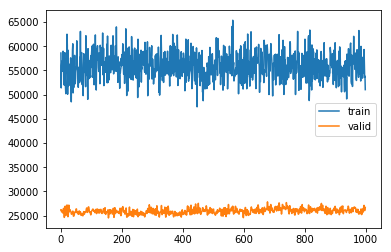

In [127]:
history3 = model3.fit(train_3, labels_3, nb_epoch=1000, batch_size=2000,validation_data=(test_3, test_labels_3), verbose=2,shuffle=False)
# plot history
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [126]:
model3.save('my_model_10.h5')  

In [97]:
from keras.models import load_model
model3 = load_model('my_model_10.h5')

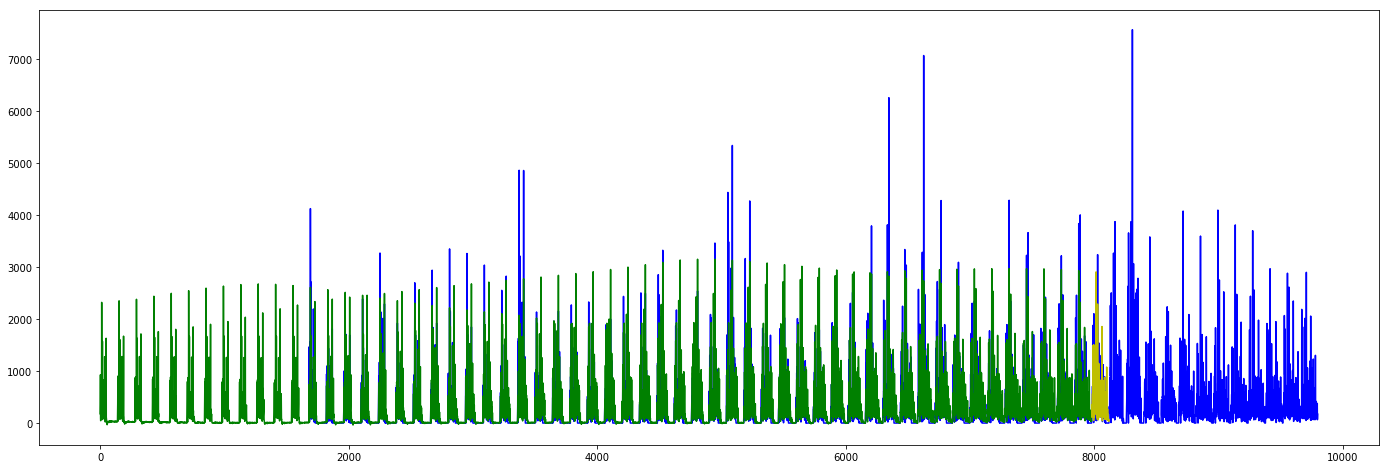

In [123]:
plt.figure(figsize=(24,8))
train_predict3 = model3.predict(train_3)
valid_predict3 = model3.predict(test_3)
#test_predict = model.predict(test_X)
plt.plot(labels[:-140], c='b')
plt.plot([x for x in train_predict3], c='g')
plt.plot([None for _ in train_predict3] + [x for x in valid_predict3], c='y')
#plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [124]:
import scipy as sp

In [125]:
sp.sqrt(sp.mean((valid_predict3.reshape(-1,) - test_labels_3) ** 2))

159.77185598515808

In [74]:
valid_predict3

array([[ 235.2095  ],
       [ 176.02602 ],
       [ 185.65567 ],
       [ 217.81772 ],
       [ 121.10798 ],
       [ 309.6761  ],
       [ 335.7842  ],
       [ 492.41434 ],
       [ 207.87378 ],
       [ 510.73734 ],
       [ 463.95374 ],
       [1285.8934  ],
       [ 595.07983 ],
       [ 514.87225 ],
       [ 142.24657 ],
       [ 525.6111  ],
       [  41.757893],
       [1333.622   ],
       [1209.8331  ],
       [ 308.50034 ],
       [ 216.18268 ],
       [ 167.0645  ],
       [ 220.17163 ],
       [ 203.0039  ],
       [ 134.66754 ],
       [ 294.83295 ],
       [ 381.02505 ],
       [ 245.26605 ],
       [ 415.82867 ],
       [ 404.83398 ],
       [ 386.85474 ],
       [ 505.07413 ],
       [ 180.59628 ],
       [ 278.7617  ],
       [ 221.54224 ],
       [ 445.6651  ],
       [2535.7488  ],
       [ 250.41785 ],
       [ 287.0181  ],
       [ 524.68353 ],
       [  92.66636 ],
       [ 134.71318 ],
       [ 244.61093 ],
       [ 433.25558 ],
       [ 194.02515 ],
       [ 6

In [100]:
ggg=np.array([1,2,3])

In [101]:
sp.mean(ggg)

2.0